# Spam Filter using Naive Bayes Classifier

In [1]:
import os
print(os.listdir("../input"))

['spam.csv']


**Import libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Read csv file**

In [3]:
df = pd.read_csv('../input/spam.csv', encoding='latin-1')[['v1', 'v2']]


Viewing after renaming the columns

In [4]:
df.columns = ['label', 'message']
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


View the lable statistics

In [5]:
df.groupby('label').describe()

message ...      
        count ...  freq
label         ...      
ham      4825 ...    30
spam      747 ...     4

[2 rows x 4 columns]

View the counts of ham and spam present in label column

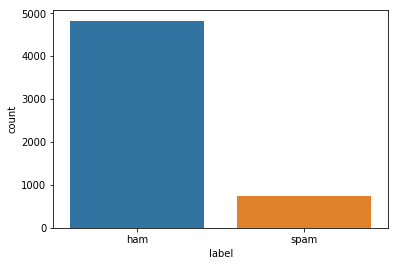

In [6]:
sns.countplot(data=df, x='label')


**Steps**
1. Clean and Normalize text
2. Convert text into vectors (BoW) we use TfIdf
3. Train and test Classifier

**Cleaning steps**
<br>
It will be done in following steps:
<br>
1. Remove punctuations
2. Remove all stopwords
3. Apply [stemming](https://en.wikipedia.org/wiki/Stemming) (get the stem of the word). 

** Write a method to return normailzed text in form of tokens (lemmas)**

In [7]:
import string
from nltk.corpus import stopwords
from nltk import PorterStemmer as Stemmer
def pre_process(text):
    text = text.lower()
    text = ''.join([t for t in text if t not in string.punctuation])
    text = [t for t in text.split() if t not in stopwords.words('english')] # All words other tha stopwrods and punctuations in lowercase
    st = Stemmer()
    text = [st.stem(t) for t in text]
    return text

In [8]:
pre_process('It\'s holiday lads :D. Mount is playing very well!!!')

['holiday', 'lad', 'mount', 'play', 'well']

In [9]:
# Test with our dataset
df['message'][:21].apply(pre_process)

0     [go, jurong, point, crazi, avail, bugi, n, gre...
1                          [ok, lar, joke, wif, u, oni]
2     [free, entri, 2, wkli, comp, win, fa, cup, fin...
3         [u, dun, say, earli, hor, u, c, alreadi, say]
4     [nah, dont, think, goe, usf, live, around, tho...
5     [freemsg, hey, darl, 3, week, word, back, id, ...
6     [even, brother, like, speak, treat, like, aid,...
7     [per, request, mell, mell, oru, minnaminungint...
8     [winner, valu, network, custom, select, receiv...
9     [mobil, 11, month, u, r, entitl, updat, latest...
10    [im, gonna, home, soon, dont, want, talk, stuf...
11    [six, chanc, win, cash, 100, 20000, pound, txt...
12    [urgent, 1, week, free, membership, å£100000, ...
13    [ive, search, right, word, thank, breather, pr...
14                                       [date, sunday]
15    [xxxmobilemovieclub, use, credit, click, wap, ...
16                                     [oh, kim, watch]
17    [eh, u, rememb, 2, spell, name, ye, v, nau

Refer scikitlearn for details on TfIDf


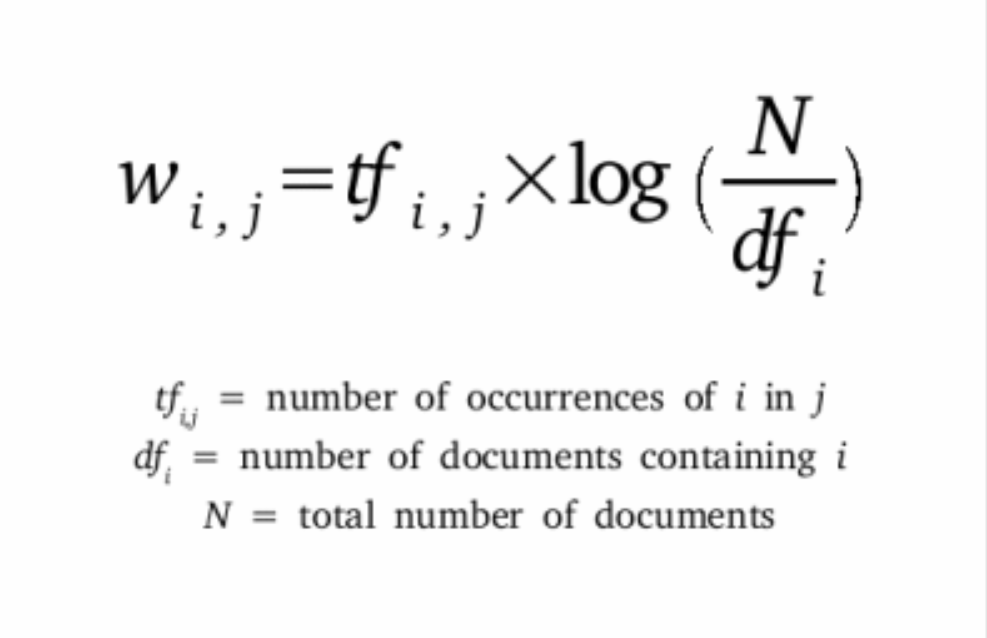

**Fit and transform SMS corpus**

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf= TfidfVectorizer(analyzer=pre_process)
data = tfidf.fit_transform(df['message'])

In [11]:
message=df.iloc[2]

In [12]:
print(tfidf.transform(df.iloc[2]))

  (0, 6535)	1.0
  (1, 7741)	0.18906287739887084
  (1, 7708)	0.14471405235314777
  (1, 7276)	0.12336193745345178
  (1, 7099)	0.2190885570936267
  (1, 6959)	0.11759458460817876
  (1, 5856)	0.16027970945850903
  (1, 5815)	0.2330497030932461
  (1, 5768)	0.2330497030932461
  (1, 4592)	0.15903719770411495
  (1, 3091)	0.11505037200973967
  (1, 2969)	0.16669800498830506
  (1, 2868)	0.4660994061864922
  (1, 2748)	0.3571909758763146
  (1, 2246)	0.20302402339849024
  (1, 2076)	0.19516151371199045
  (1, 1180)	0.16669800498830506
  (1, 833)	0.2190885570936267
  (1, 433)	0.22518719340674634
  (1, 420)	0.22518719340674634
  (1, 413)	0.09987750376879972
  (1, 72)	0.2330497030932461


**Having messages in form of vectors, we are ready to train our classifier. <br>We will use Naive Bayes which is well known classifier while working with text data. 
<br>Before that we will use pipeline feature of sklearn to create a pipeline of TfidfVectorizer followed by Classifier.**
<br>Input will be message passed to first stage TfidfVectorizer which will transform it and pass it to Naive Bayes Classifier to get output label

In [13]:
 from sklearn.base import TransformerMixin
class DenseTransformer(TransformerMixin):

    def fit(self, X, y=None, **fit_params):
        return self

    def transform(self, X, y=None, **fit_params):
        return X.todense()

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB, MultinomialNB
spam_filter = Pipeline([
    ('vectorizer', TfidfVectorizer(analyzer=pre_process)),
    ('to_dense', DenseTransformer()),
    ('classifier', GaussianNB())                   
])

train test split

In [15]:
from sklearn.model_selection import train_test_split
x=df['message']
y=df['label']
x=x.values
y=y.values
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state = 21) #Pareto principle

**Train spam_filter**

In [16]:
spam_filter.fit(x_train, y_train)

Pipeline(memory=None,
     steps=[('vectorizer', TfidfVectorizer(analyzer=<function pre_process at 0x7faf8c4ac400>,
        binary=False, decode_error='strict', dtype=<class 'numpy.float64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), norm='l...ransformer object at 0x7faf4fee5390>), ('classifier', GaussianNB(priors=None, var_smoothing=1e-09))])

**Predict for test cases**

In [17]:
predictions = spam_filter.predict(x_test)

In [18]:
count = 0
for i in range(len(y_test)):
    if y_test[i] != predictions[i]:
        count += 1
print('Total number of test cases', len(y_test))
print('Number of wrong of predictions', count)

Total number of test cases 1115
Number of wrong of predictions 140


**Check for wrong predictions that were classified as ham**

In [19]:
#x_test[y_test != predictions]

**Use classification report to get more details**

In [20]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print(classification_report(predictions, y_test))
accuracy_score(y_test, predictions)

              precision    recall  f1-score   support

         ham       0.87      0.98      0.92       861
        spam       0.91      0.50      0.64       254

   micro avg       0.87      0.87      0.87      1115
   macro avg       0.89      0.74      0.78      1115
weighted avg       0.88      0.87      0.86      1115



0.874439461883408

Function to predict whether passed message is ham or spam

In [21]:
def detect_spam(s):
    return spam_filter.predict([s])[0]
detect_spam('Your cash-balance is currently 500 pounds - to maximize your cash-in now, send COLLECT to 83600.')

'spam'

In [22]:
from sklearn.metrics import confusion_matrix

In [23]:
confusion_matrix(predictions,y_test)

array([[848,  13],
       [127, 127]])